<a href="https://colab.research.google.com/github/Uz8351/MyPhython/blob/master/aula28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/1 [==============================] - 1s 1s/step


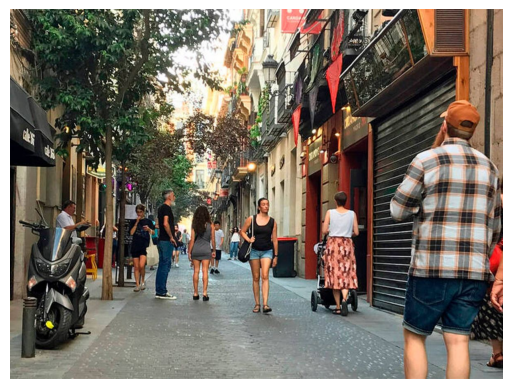

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.preprocessing import image

# Cargar la imagen desde la ruta proporcionada
image_path = '/content/drive/MyDrive/personas.jpg'
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Cargar el modelo preentrenado MobileNetV2
model = MobileNetV2(weights='imagenet')

# Cambiar el tamaño de la imagen para adaptarse a la entrada de MobileNetV2
img_resized = cv2.resize(img_rgb, (224, 224))
img_resized = image.img_to_array(img_resized)
img_resized = np.expand_dims(img_resized, axis=0)
img_resized = preprocess_input(img_resized)

# Hacer predicciones con MobileNetV2
predictions = model.predict(img_resized)

# Obtener las clases correspondientes a las personas en COCO dataset
person_class_index = 17

# Filtrar las predicciones para obtener solo las personas
person_predictions = (predictions.argmax(axis=1) == person_class_index)

# Crear una máscara con las regiones de personas detectadas
mask = np.zeros_like(img_rgb)
mask[person_predictions[0], :, :] = [255, 0, 0]  # Marcar en rojo

# Superponer la máscara en la imagen original
result = cv2.addWeighted(img_rgb, 1, mask, 0.5, 0)

# Mostrar la imagen resultante
plt.imshow(result)
plt.axis('off')
plt.show()


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Reshape

# Cargar la imagen desde la ruta proporcionada
image_path = '/content/drive/MyDrive/personas.jpg'
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Cargar la red preentrenada MobileNetV2 sin las capas completamente conectadas
base_model = MobileNetV2(weights='imagenet', include_top=False)

# Añadir capas de convolución adicionales para la segmentación de instancias
x = base_model.output
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Añadir capa de remodelación para obtener la máscara de segmentación
x = Reshape((224, 224))(x)

# Crear el modelo de segmentación de instancias
model = Model(inputs=base_model.input, outputs=x)

# Cambiar el tamaño de la imagen para adaptarse a la entrada de MobileNetV2
img_resized = cv2.resize(img_rgb, (224, 224))
img_resized = image.img_to_array(img_resized)
img_resized = np.expand_dims(img_resized, axis=0)
img_resized = preprocess_input(img_resized)

# Obtener la máscara de segmentación de instancias
mask = model.predict(img_resized)

# Superponer la máscara en la imagen original y resaltar las personas en rojo
result = np.where(mask > 0.5, [255, 0, 0], img_rgb)

# Mostrar la imagen resultante
plt.imshow(result)
plt.axis('off')
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Reshape

# Cargar la imagen desde la ruta proporcionada
image_path = '/content/drive/MyDrive/personas.jpg'
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Cargar la red preentrenada MobileNetV2 sin las capas completamente conectadas
base_model = MobileNetV2(weights='imagenet', include_top=False)

# Añadir capas de convolución adicionales para la segmentación de instancias
x = base_model.output
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Añadir capa de remodelación para obtener la máscara de segmentación
x = Reshape((224, 224))(x)

# Crear el modelo de segmentación de instancias
model = Model(inputs=base_model.input, outputs=x)

# Cambiar el tamaño de la imagen para adaptarse a la entrada de MobileNetV2
img_resized = cv2.resize(img_rgb, (224, 224))
img_resized = image.img_to_array(img_resized)
img_resized = np.expand_dims(img_resized, axis=0)
img_resized = preprocess_input(img_resized)

# Obtener la máscara de segmentación de instancias
mask = model.predict(img_resized)

# Superponer la máscara en la imagen original y resaltar las personas en rojo
result = np.where(mask > 0.5, [255, 0, 0], img_rgb)

# Mostrar la imagen resultante
plt.imshow(result)
plt.axis('off')
plt.show()
